# Naive Bayes Probabilistic Classifier

## No, "Naive" isn't a Mathematician

The word "Naive" refers to an actual **naive** assumption made the this algorithm that makes it work!

"Bayes", however, was a mathematician. **Bayes' Theorem** is integral to the Naive Bayes algorithm

## Bayes' Theorem

$$
P(C_k \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid C_k) \cdot P(C_k)}{P(\mathbf{x})}
$$

Breaking down each parameter/variable

- Posterior $P(C_k \mid \mathbf{x})$: "Given features x, what is the chance this class is $C_k$  "
- Likelihood $P(\mathbf{x} \mid C_k)$: "If the class were $C_k$  , how likely are these features?"
- Prior $P(C_k)$: "How common is the class $C_k$   overall?"
- Evidence $P(\mathbf{x})$: "How likely is it to see these features in general?"


## What does Bayes Theorem actually do 

The goal of Bayes theorem is to allow us to **invert** a probability. 

## The "Naive" Assumption? 

The **Naive** Bayes assumes that all features are **conditionally independent** given the class

$$
P(\mathbf{x} \mid C_k) = \prod_{j=1}^{d} P(x_j \mid C_k)
$$

Don't get intimidated --- this math expression just means: 

"The probability of the entire feature vector x, given class $C_k$, is equal to the product of *individual probabilities* of each feature $x_j$, given the class."

So let's say you are classifying animals. 

Let's say the feature vector is this


$$
\mathbf{x} = [x_1, x_2, x_3] = [\text{"has fur"}, \text{"has claws"}, \text{"has tail"}]
$$

And we want to compute this 

$$
P(\mathbf{x} \mid C_k) = P(\text{has fur, has claws, has tail} \mid \text{cat})
$$

This is the probability that an animal has fur, claws, and tail, given that it is a cat. 

Naive Bayes assumes that **each feature is conditionally independent** given the class.  
So instead of computing a joint probability, we do:


$$
P(\mathbf{x} \mid \text{cat}) = P(x_1 \mid \text{cat}) \cdot P(x_2 \mid \text{cat}) \cdot P(x_3 \mid \text{cat})
$$

Instead of a joint probability like 

$$
P(\text{has fur AND claws AND tail} \mid \text{cat})
$$



## The Prediction Rule 

$$
\hat{y} = \arg\max_k \; P(C_k) \cdot \prod_{j=1}^{d} P(x_j \mid C_k)
$$

## What is actually being "trained"? 

Let's say you have 
- $K$ classes 
- Each input $x$ = [$x_1,x_2,....,x_d$] had $d$ features
- Assume $x_j$ is **conditionally independent** and **Gaussian** for each class


So, for each class, we compute 

1. The Prior $P(C_k)$: The Frequency of class $C_k$ in the training set 
2. For each feature $x_j$ in that class we compute: 

The mean: 

$$
\mu_{jk} = \text{mean of } x_j \text{ for class } C_k \\
$$

where 
$$
\mu_{jk} = \frac{1}{N_k} \sum_{i: y_i = C_k} x_{ij}
$$

Then, the variance: 

$$
\sigma_{jk}^2 = \text{variance of } x_j \text{ for class } C_k
$$

where 

$$
\sigma_{jk}^2 = \frac{1}{N_k} \sum_{i: y_i = C_k} (x_{ij} - \mu_{jk})^2
$$

So then, we're learning the **parameters of the distributions that describe each class**. 

These parameters let you score how well a new input fits each class. 

## How do we apply this then?


There are multiple ways we can apply this assumption dependin on the type of data we have. 
- Gaussian Naive Bayes --> Features are Gaussian-distributed
- Multinomial Naive Bayes --> For discrete counts 
- Bernoulli Naive Bayes --> For binary features 

## Implementing a Naive Bayes for a Gaussian Distribution

### Import libraries 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### Generate synthetic dataset

In [2]:
# Create 2D Dataset with 2 classes 

X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1,
    n_informative=2, 
    n_redundant=0, 
    random_state=42
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {}
        self.means = {}
        self.vars = {}

        for c in self.classes:
            X_c = X[y == c]
            # Compute the class prior 
            self.priors[c] = X_c.shape[0] / X.shape[0]
            # Compute the mean of each feature for class C_k
            self.means[c] = np.mean(X_c, axis=0)
            # Compute the variance of each feature for Class C_kyes
            self.vars[c] = np.var(X_c, axis=0)

    # Compute the Gaussian Probability Density Function
    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        numerator = np.exp(- (x - mean)**2/(2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihoods = self._pdf(c, x)
            log_likelihood = np.sum(np.log(likelihoods))
            posteriors.append(prior + log_likelihood)
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])



## Evaluate this function

In [5]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)


In [7]:
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## Visualizing the Decision Boundary

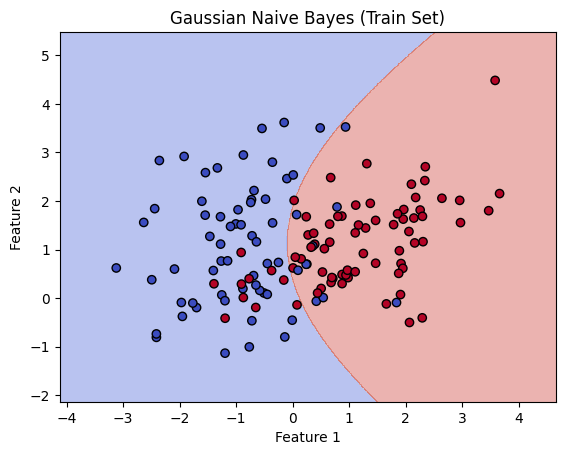

In [9]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title="Gaussian Naive Bayes"):
    h = 0.01 # Step size int he mesh 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function with training data
plot_decision_boundary(model, X_train, y_train, title="Gaussian Naive Bayes (Train Set)")
